# Compute gcorr diseases and phenotypes (ldscr)
###### Created 03/08/2022
###### Last modification 22/12/2022

In [199]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import glob, os
from os import listdir
from os.path import isfile, join
from datetime import datetime

In [200]:
### Copied from config

MAIN_LABELS='mean_angle_taa,mean_angle_tva,tau1_vein,tau1_artery,ratio_AV_DF,eq_CRAE,ratio_CRAE_CRVE,D_A_std,D_V_std,eq_CRVE,ratio_VD,VD_orig_artery,bifurcations,VD_orig_vein,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
MAIN_NAMES='A temporal angle,V temporal angle,V tortuosity,A tortuosity,ratio tortuosity,A central retinal eq,ratio central retinal eq,A std diameter,V std diameter,V central retinal eq,ratio vascular density,A vascular density,bifurcations,V vascular density,A median diameter,V median diameter,ratio median diameter'
traits_phenos = list(MAIN_LABELS.split(","))
traits_phenos_new = list(MAIN_NAMES.split(","))


path = '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/gcorr_diseases/'


### Read from csv
file_info_name='pheno_diseases_info.csv'

df_inf_csv = pd.read_csv('~/retina-phenotypes/complementary/'+ file_info_name)
print('len(df_inf_csv):', len(df_inf_csv))
df_inf_filt =  df_inf_csv[df_inf_csv['lscr_analysis'] == 'TRUE']
print('len(df_inf_filt):', len(df_inf_filt))
traits_all = list(df_inf_filt['datafield'].values)
traits_all_new = list(df_inf_filt['final_name'].values)



len(df_inf_csv): 89
len(df_inf_filt): 24


#### Page with the ldsr files:
#### https://nealelab.github.io/UKBB_ldsc/downloads.html#ldsc_sumstat_files

In [201]:
#high_med_conf= False # False
#path = '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/gcorr_diseases/'
#path = '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_ZERO/gcorr_diseases/2022_08_03_ventile5/'


# if high_med_conf:
#     diseases_traits = {
#         '4079':'DBP',
#         '4080':'SBP',
#         '102':'PR',
#         '30760':'HDL cholesterol',
#         '1558':'Alcohol intake freq',
#         '21021':'Pulse wave arterial stiffness',
#         '30780':'LDL direct',
#         '30870':'Triglycerides',
#         '20002_1094': 'DVT', 
#         '20116_0': 'Smoking status: Never', 
#         '20116_2': 'Smoking status: Current', 
#         '2443': 'Diabetes', 
#         '6148_4': 'Cataract', 
#         '6150_1': 'Heart attack', 
#         '6150_2': 'Angina', 
#         '6150_3': 'Stroke', 
#         '6150_4': 'High blood pressure'
#         } 

# else:
#     diseases_traits = {
#         '4079':'DBP',
#         '4080':'SBP',
#         '102':'PR',
#         '6150_4': 'High blood pressure',
#         '21021': 'Pulse wave ASI',
#         '30760':'HDL cholesterol',
#         '30780':'LDL direct',
#         '30870': 'Triglycerides',
#         ##########'30750': 'HbA1c',
#         ##########'21001': 'BMI',
#         '1558': 'Alcohol intake freq',
#         '20116_0': 'Smoking status: Never', 
#         #'20116_1': 'Smoking status: Previous', 
#         '20116_2': 'Smoking status: Current', 
#         #'1717': 'Skin colour',
#         #'1747_1': 'Hair colour blonde',
#         #'1747_2': 'Hair colour red',
#         #'1747_3': 'Hair colour light brown',
#         #'1747_4': 'Hair colour dark brown',
#         #'1747_5': 'Hair colour black',
#         #'1747_6': 'Hair colour other',
#         '20002_1094': 'Varicose veins 20002', 
#         #'4012': 'DVT',
#         #'I83': 'Varicose veins of lower extremities',
#         #'I9_DISVEINLYMPH': 'Diseases of veins, lymphatic vessels and lymph nodes',
#         #'2976': 'Diabetes age',
#         '2443': 'Diabetes',
#         #'20002_1220':'Diabetes 20002',
#         #'20002_1223':'type 2 diabetes 20002',	
#         '6148_2': 'Glaucoma (6148_2)',
#         #'H40': 'Glaucoma_H40',
#         '6148_4': 'Cataract (6148_4)', 
#         #'20002_1278': 'Cataract_20002',
#         '6150_1': 'Heart attack (6150_1)', 
#         #'3627': 'Angina age',
#         '6150_2': 'Angina (6150_2)', 
#         #'4056':'Sroke age',
#         '6150_3':'Sroke (6150_3)',	
#         #'20002_1081': 'Sroke 20002',	
#         #'C_STROKE': 'Stroke C STROKE',
#         #'I9_STR': 'Stroke  excluding SAH I9',
#         #'I9_STR_EXH': 'Ischaemic Stroke excluding all haemorrhages I9',
#         #'I9_STR_SAH': 'Stroke including SAH I9',
#         'I9_CORATHER': 'Coronary atherosclerosis I9',
#         'I9_PAD': 'Peripheral artery disease I9_PAD',
#         '6147_1':'Glasses myopia (6147_1)',
#         '6147_2':'Glasses hypermetropia (6147_2)' #,
#         #'6147_3':'Glasses presbyopia (6147_3)',
#         #'6147_4':'Glasses astigmatism (6147_4)',
#         #'6147_5':'Glasses strabismus (6147_5)',
#         #'6147_6':'Glasses amblyopia (6147_6)',
#         #'20002_1093': 'Pulmonary embolism 20002',
# 	    #'22130': 'Pulmonary embolism otro2',
#         #'I26': 'Pulmonary embolism I26',
# 	    #'J44': 'Pulmonary embolism J44',
# 	    #'I9_DVTANDPULM': 'Pulmonary embolism I9_DVTANDPULM'#,
#         #'6147_6': 'Glasses amblyopia' #,
#         #'5610_1': 'Presbyopia right eye',
#         #'5610_2': 'Presbyopia left eye',
#         #'5610_3': 'Presbyopia both eyes',
#         #'5832_3': 'Hypermetropia both eyes',
#         #'5843_1': 'Myopia right eyes',
#         #'5843_2': 'Myopia left eyes',
#         #'5843_3': 'Myopia both eyes',
#         #'5855_1': 'Astigmatism right eye',	
#         #'5855_2': 'Astigmatism left eye',	
#         #'5855_3': 'Astigmatism both eye'#,	
#         #'6148_1':'Diabetes related eye disease',
#         #'40007':'Mortality'
#         } 
# #KeyError: "['4022', '4689', '5890', '5945', '131380', '131390', '42020', '5408', '40000', '102'] not in index"

#traits_all = list(diseases_traits.keys())
#sss = list(diseases_traits.values())

In [202]:
# path This we can read from config
def try_to_compute_all(traits_all):
    
    save_path = path
    l_diseases_all=[]
    for trait in traits_all:
        #print(trait)
        for file in os.listdir(path):
            #print(file, '\n')
            if file.startswith(trait):
                if (file.endswith('.tsv.bgz'))  or (file.endswith('.tsv')):
                    print('PHENO', trait)
                    print(file, '\n')
                    #df_ss = pd.read_csv(path + file,  nrows=1, sep='\t')
                    #print(df_ss['N'].iloc[0])
                    #print(file)
                    data={
                        'pheno':  trait,
                        'file':  file
                        #,'N': df_ss['N'].iloc[0],
                        }
                    l_diseases_all.append(data)

    df_diseases_all =pd.DataFrame(l_diseases_all)
    #file_name_end = '_irnt.gwas.imputed_v3.both_sexes.tsv'

    l_traits_file=[]
    for trait in traits_phenos:
        file_pheno= trait + '__munged.sumstats.gz'
        l_traits_file.append(file_pheno)

    traits_files = l_traits_file + list(df_diseases_all['file'])
    traits_names = traits_phenos + list(df_diseases_all['pheno'])
    print(len(traits_files), len(l_traits_file), len(list(df_diseases_all['file'])))
    return df_diseases_all

df_diseases_all = try_to_compute_all(traits_all)

PHENO 4079
4079_irnt.ldsc.imputed_v3.both_sexes.tsv 

PHENO 4080
4080_irnt.ldsc.imputed_v3.both_sexes.tsv 

PHENO 6150_4
6150_4.ldsc.imputed_v3.both_sexes.tsv 

PHENO 102
102_irnt.ldsc.imputed_v3.both_sexes.tsv 

PHENO 21021
21021_irnt.ldsc.imputed_v3.both_sexes.tsv 

PHENO 30760
30760_irnt.imputed_v3.ldsc.both_sexes.tsv 

PHENO 30780
30780_irnt.imputed_v3.ldsc.both_sexes.tsv 

PHENO 30870
30870_irnt.imputed_v3.ldsc.both_sexes.tsv 

PHENO 30750
30750_irnt.imputed_v3.ldsc.both_sexes.tsv 

PHENO 1558
1558.ldsc.imputed_v3.both_sexes.tsv 

PHENO 20116_0
20116_0.ldsc.imputed_v3.both_sexes.tsv 

PHENO 20116_1
20116_1.ldsc.imputed_v3.both_sexes.tsv 

PHENO 20116_2
20116_2.ldsc.imputed_v3.both_sexes.tsv 

PHENO 21001
21001_irnt.ldsc.imputed_v3.both_sexes.tsv 

PHENO 6148_2
6148_2.ldsc.imputed_v3.both_sexes.tsv 

PHENO 6148_4
6148_4.ldsc.imputed_v3.both_sexes.tsv 

PHENO 6147_2
6147_2.imputed_v3.ldsc.both_sexes.v2.tsv 

PHENO 6147_1
6147_1.imputed_v3.ldsc.both_sexes.v2.tsv 

PHENO 2443
2443.lds

In [203]:
#df_diseases_all= df_diseases_all.drop_duplicates(subset='pheno')
df_diseases_all

,pheno,file
0,4079,4079_irnt.ldsc.imputed_v3.both_sexes.tsv
1,4080,4080_irnt.ldsc.imputed_v3.both_sexes.tsv
2,6150_4,6150_4.ldsc.imputed_v3.both_sexes.tsv
3,102,102_irnt.ldsc.imputed_v3.both_sexes.tsv
4,21021,21021_irnt.ldsc.imputed_v3.both_sexes.tsv
5,30760,30760_irnt.imputed_v3.ldsc.both_sexes.tsv
6,30780,30780_irnt.imputed_v3.ldsc.both_sexes.tsv
7,30870,30870_irnt.imputed_v3.ldsc.both_sexes.tsv
8,30750,30750_irnt.imputed_v3.ldsc.both_sexes.tsv
9,1558,1558.ldsc.imputed_v3.both_sexes.tsv


In [204]:

#datafields_irnt = [ dat + "_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz" for dat in traits_reduced]
datafields_irnt = [ dat for dat in df_diseases_all['file']]
datafields_pheno = [ dat + "__munged.sumstats.gz" for dat in traits_phenos]
diseasess_tra_aux = [ dat for dat in df_diseases_all['pheno']]

traits_col_index = traits_phenos + diseasess_tra_aux
traits_names = datafields_pheno + datafields_irnt

In [205]:
### IMPORTANT: If you have not same file go back to diseases_traits and comment 
### the phenotypes that are missing

In [208]:
# filter the files names containing 2 traits
def read_ldsr(traits_files, traits_col_index):
    df_cov=pd.DataFrame(columns =traits_col_index, index=traits_col_index)
    df_corr=pd.DataFrame(columns =traits_col_index, index=traits_col_index)
    df_std=pd.DataFrame(columns =traits_col_index, index=traits_col_index)
    #2976_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz_4700_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz.log
    #2976_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz_D_A_std__munged.sumstats.gz.log

    for i  in range(len(traits_files)):
        for j in range(len(traits_files)):
            h2 = []
            file_both_name = traits_files[i]+'_'+ traits_files[j]+'.log'
            dir_traitsfile = path+file_both_name
            #print(dir_traitsfile)
            with open(dir_traitsfile) as fp:
                #print(fp)
                #print(traits_files[i],traits_files[j])
                Lines = fp.readlines()
                for line in Lines:
                    #print(line)
                    split = line.split()
                    if('gencov:' in split):
                        df_cov.iloc[i][j] = round(float(split[ split.index('gencov:') +1 ]),2)
                        df_cov.iloc[j][i] = round(float(split[ split.index('gencov:') +1 ]),2)
                        #print(split)
                    if('Correlation:' in split):
                        #print(line)
                        #print(split)
                        df_corr.iloc[i][j] = round(float(split[ split.index('Correlation:') +1 ]),2)
                        df_corr.iloc[j][i] = round(float(split[ split.index('Correlation:') +1 ]),2)
                        #print(array2)
                        #print(split )
                        #print( df_corr.iloc[i][j], float(split[ split.index('Correlation:') +1 ]) )
                        #print( df_corr.iloc[j][i], float(split[ split.index('Correlation:') +1 ]))
                        df_std.iloc[i][j] = split[3]
                        df_std.iloc[j][i] = split[3]
    return df_cov, df_corr, df_std

df_cov, df_corr, df_std2 = read_ldsr(traits_names, traits_col_index)     

In [209]:
df_corr

,mean_angle_taa,mean_angle_tva,tau1_vein,tau1_artery,ratio_AV_DF,eq_CRAE,ratio_CRAE_CRVE,D_A_std,D_V_std,eq_CRVE,...,6148_2,6148_4,6147_2,6147_1,2443,6150_2,6150_1,6150_3,I9_CORATHER,I9_PAD
mean_angle_taa,1,0.66,0.1,0.16,0.12,0.28,-0.09,0.23,0.18,0.33,...,0.07,0.13,-0.11,-0.01,-0.05,-0.05,-0.04,-0.05,-0.1,-0.08
mean_angle_tva,0.66,1,0.18,0.17,0.06,0.21,-0.16,0.17,0.33,0.33,...,-0.04,-0.05,-0.11,0.09,-0.07,-0.14,-0.05,-0.1,-0.12,-0.15
tau1_vein,0.1,0.18,1,0.52,-0.05,0.01,0.1,-0.12,-0.15,-0.1,...,0.03,-0.02,0.09,0.04,-0.08,-0.01,0.04,0.12,-0.02,-0.02
tau1_artery,0.16,0.17,0.52,1,0.82,0.05,0.01,0.08,0,0,...,-0.07,-0,-0.02,0.02,0.03,0.04,0.03,0.15,0.01,0.09
ratio_AV_DF,0.12,0.06,-0.05,0.82,1,0.06,-0.04,0.17,0.1,0.06,...,-0.1,-0.01,-0.09,0.02,0.08,0.05,-0.01,0.1,0.02,0.12
eq_CRAE,0.28,0.21,0.01,0.05,0.06,1,0.43,0.75,0.36,0.51,...,0.05,0.14,-0.11,0.13,-0.04,0.17,0.12,-0.04,0.08,0.35
ratio_CRAE_CRVE,-0.09,-0.16,0.1,0.01,-0.04,0.43,1,0.06,-0.59,-0.55,...,0.04,-0.04,-0.01,0.02,0.09,0.23,0.23,0.26,0.17,0.37
D_A_std,0.23,0.17,-0.12,0.08,0.17,0.75,0.06,1,0.63,0.62,...,-0.03,0.02,-0.09,0.16,-0.11,0.05,-0.02,-0.14,0.02,0.12
D_V_std,0.18,0.33,-0.15,0,0.1,0.36,-0.59,0.63,1,0.9,...,-0.09,0.13,-0.13,0.12,-0.11,-0.05,-0.09,-0.19,-0.09,0.07
eq_CRVE,0.33,0.33,-0.1,0,0.06,0.51,-0.55,0.62,0.9,1,...,0.02,0.2,-0.07,0.1,-0.11,-0.02,-0.06,-0.22,-0.06,-0.02


In [210]:
def rename_col_index(df, l_phenos_old, l_phenos_new, l_diseases_old, l_diseases_new):
      df.rename(columns=dict(zip(l_diseases_old, l_diseases_new)), inplace=True)
      df.rename(index=dict(zip(l_phenos_old, l_phenos_new)), inplace=True)
      return df

def detele_col_index(df, l_phenos_old, l_phenos_new, l_diseases_old, l_diseases_new):
      #print(l_phenos_old, l_phenos_new)
      df=df.drop(columns=l_phenos_old)
      #print(df.index)
      #print(l_diseases_old)
      #df=df.drop(index=l_diseases_old)
      df = df[df.index.isin(l_phenos_old)]
      #print(df)
      df= rename_col_index(df, l_phenos_old, l_phenos_new, l_diseases_old, l_diseases_new)    
      return df

df_corr_simpl = detele_col_index(df_corr, traits_phenos, traits_phenos_new, traits_all, traits_all_new)
df_std_simpl = detele_col_index(df_std2,  traits_phenos, traits_phenos_new, traits_all,  traits_all_new)

#df_std_simpl =  df_std2 #.astype(float)
#df_corr_simpl = df_corr.astype(float)

In [211]:
#df_std_simpl.drop_duplicates(inplace=True)
df_std_simpl = df_std_simpl.loc[:,~df_std_simpl.columns.duplicated()].copy()
df_std_simpl.columns

Index(['DBP', 'SBP', 'High blood pressure  (6150_4)', 'PR', 'Pulse wave ASI',
       'HDL cholesterol', 'LDL direct', 'Triglycerides', 'HbA1c',
       'Alcohol intake frequency', 'Smoking status: Never (20116_0)',
       'Smoking status: Previous (20116_1)',
       'Smoking status: current (20116_2)', 'BMI', 'Glaucoma (6148_2)',
       'Cataract (6148_4)', 'Glasses hypermetropia (6147_2)',
       'Glasses myopia (6147_1)', 'Diabetes (2443)', 'Angina (6150_2)',
       'Heart attack (6150_1)', 'Sroke (6150_3)',
       'Coronary atherosclerosis (I9_CORATHER)',
       'Peripheral artery disease (I9_PAD)'],
      dtype='object')

In [212]:
#df_std_simpl = df_std_simpl.astype(str)
for col in df_std_simpl.columns:
    #print(col)
    #print(df_std_simpl[col].head(3))
    df_std_simpl[col] = df_std_simpl[col].str.replace("(", "", regex=True)
    df_std_simpl[col] = df_std_simpl[col].str.replace(")", "", regex=True)

df_std_simpl=df_std_simpl.astype(float)
df_std_simpl=df_std_simpl.round(2)
df_std_simpl.dtypes

DBP                                       float64
SBP                                       float64
High blood pressure  (6150_4)             float64
PR                                        float64
Pulse wave ASI                            float64
HDL cholesterol                           float64
LDL direct                                float64
Triglycerides                             float64
HbA1c                                     float64
Alcohol intake frequency                  float64
Smoking status: Never (20116_0)           float64
Smoking status: Previous (20116_1)        float64
Smoking status: current (20116_2)         float64
BMI                                       float64
Glaucoma (6148_2)                         float64
Cataract (6148_4)                         float64
Glasses hypermetropia (6147_2)            float64
Glasses myopia (6147_1)                   float64
Diabetes (2443)                           float64
Angina (6150_2)                           float64


In [213]:
table_plot='False'

if table_plot=='True':
    #print(df_reducida.columns, df_std.columns)
    df = df_corr_simpl.astype(str) + ' (' + df_std_simpl.astype(str)+ ')'



    df_corr_simpl_aux = df_corr_simpl.copy()
    df_corr_simpl_aux = df_corr_simpl_aux.astype(float)

    rcolors = plt.cm.Greys(np.full(len(df.index), 0.15))
    ccolors = plt.cm.Greys(np.full(len(df.columns), 0.15))
    fig, ax = plt.subplots()
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    #create table
    table = ax.table(cellText=df.values, 
                    #rowColours=rcolors,
                    colLabels=df.columns, 
                    rowLabels=df.index,
                    #colColours=ccolors,
                    rowLoc='center',
                    colLoc='center',
                    cellLoc='center',
                    cellColours=plt.cm.viridis(df_corr_simpl_aux.values, alpha=0.5),
                    loc='center',
                    fontsize=16,
                    colWidths=[0.15 for x in df.columns])


    table.auto_set_font_size(False)
    table.set_fontsize(16)
    table.scale(3.7, 3.5) # make table a little bit larger
    fig.tight_layout()
    #plt.show()
    #fig.savefig(save_dir+str(DATE)+'_'+'ventile'+str(ventile_num)+'_diseases_gcorr.pdf', bbox_inches='tight',dpi=250)


In [214]:
#len(df_corr_simpl)

In [215]:
set(traits_all)-set(df_diseases_all['pheno'])

set()

In [216]:
set(traits_all_new)-set(df_corr_simpl.columns)

set()

In [217]:
len(traits_all_new)

24

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0.5, 0, 'DBP'),
  Text(1.5, 0, 'SBP'),
  Text(2.5, 0, 'High blood pressure  (6150_4)'),
  Text(3.5, 0, 'PR'),
  Text(4.5, 0, 'Pulse wave ASI'),
  Text(5.5, 0, 'HDL cholesterol'),
  Text(6.5, 0, 'LDL direct'),
  Text(7.5, 0, 'Triglycerides'),
  Text(8.5, 0, 'HbA1c'),
  Text(9.5, 0, 'Alcohol intake frequency'),
  Text(10.5, 0, 'Smoking status: Never (20116_0)'),
  Text(11.5, 0, 'Smoking status: Previous (20116_1)'),
  Text(12.5, 0, 'Smoking status: current (20116_2)'),
  Text(13.5, 0, 'BMI'),
  Text(14.5, 0, 'Glaucoma (6148_2)'),
  Text(15.5, 0, 'Cataract (6148_4)'),
  Text(16.5, 0, 'Glasses hypermetropia (6147_2)'),
  Text(17.5, 0, 'Glasses myopia (6147_1)'),
  Text(18.5, 0, 'Diabetes (2443)'),
  Text(19.5, 0, 'Angina (6150_2)'),
  Text(20.5, 0, 'Heart attack (6150_1)'),
  Text(21.5, 0, 'Sroke (6150_3)'),
  Text(

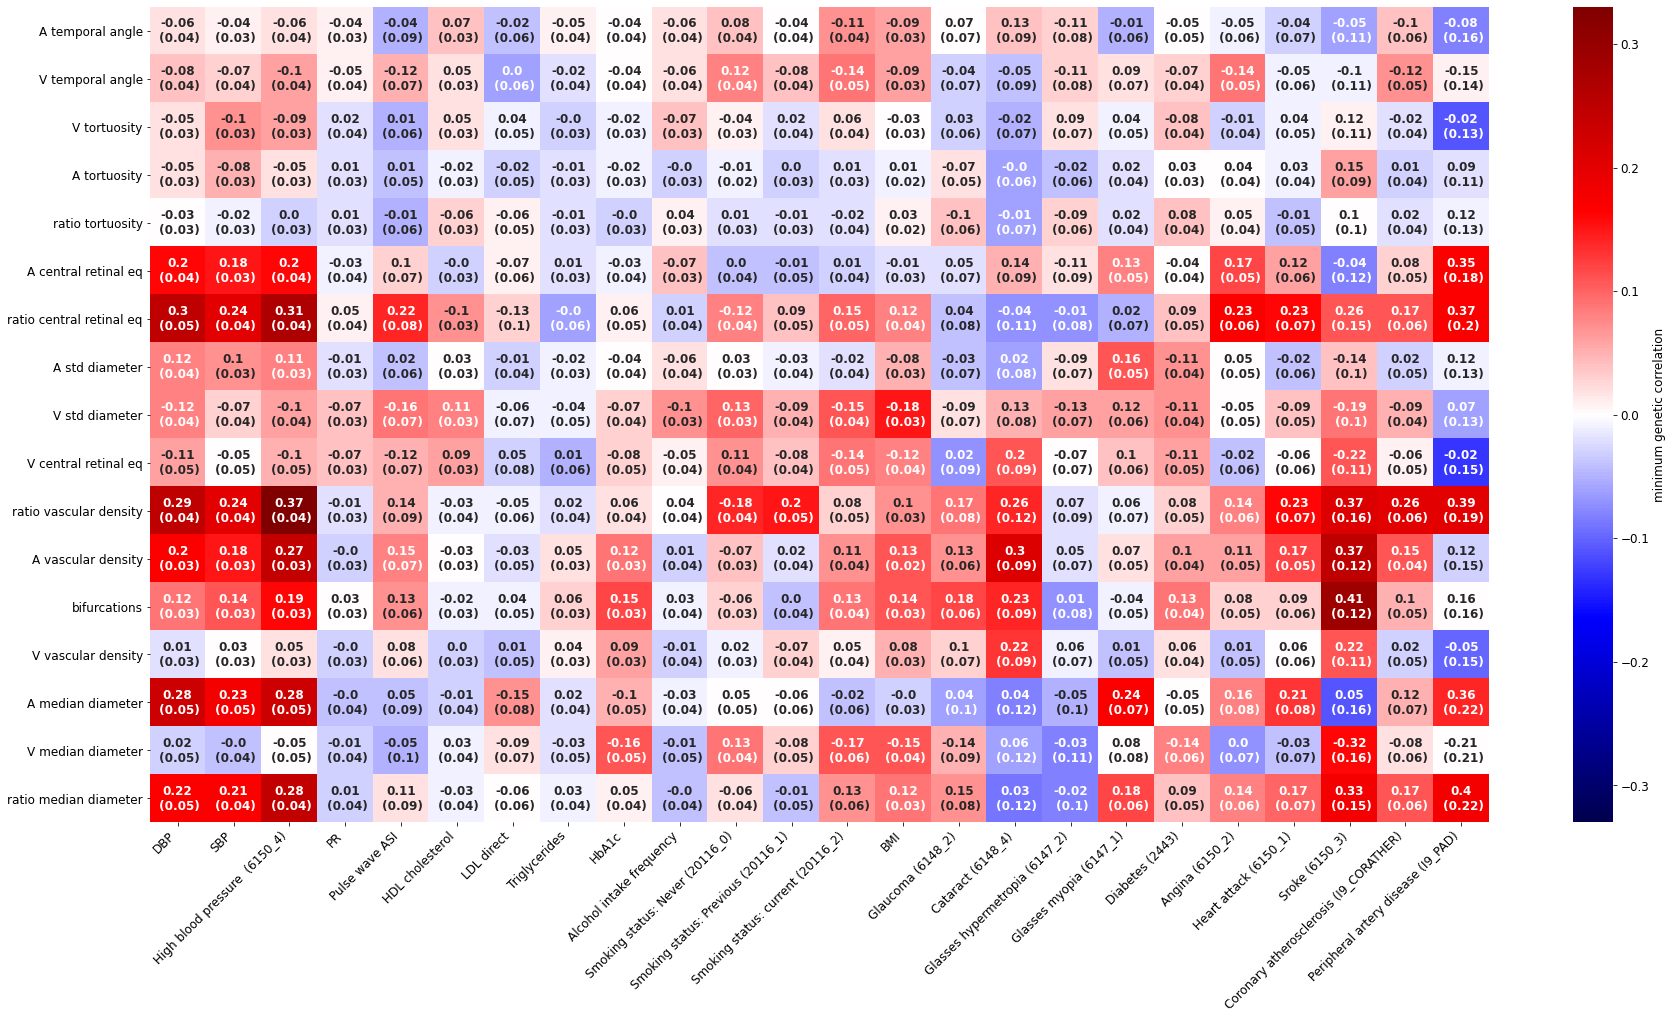

In [218]:
##min gcorr
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12

df_corr_minus_std= (abs(df_corr_simpl) - abs(df_std_simpl))


df = df_corr_simpl.astype(str) + '\n (' + df_std_simpl.astype(str)+ ')'

df_corr_minus_std = df_corr_minus_std.astype(float)

plt.rcParams['font.size'] = '12'
#figsize_val_2=(30, 30)
figsize_val_2=(30, 15)
#figsize_val_2=(10, 10)
fig, ax = plt.subplots(figsize=figsize_val_2)
fig1 = sns.heatmap(df_corr_minus_std, 
            annot=df.values, #(log10p>Bonf_thresh).replace({True:'*', False:''}), 
            cbar=True, #If not False
            fmt="", annot_kws={'weight': 'bold'}, 
            vmin=-abs(df_corr_minus_std).max().max(), 
            vmax=abs(df_corr_minus_std).max().max(), 
            cmap='seismic',alpha=1.0, cbar_kws={'label': 'minimum genetic correlation'},
            ax=ax)
plt.xticks(rotation=45, ha='right')

## - SQUARED (all):

#### a) HEAT MAP all:

Text(0.5, 1.0, 'Genetic Correlation')

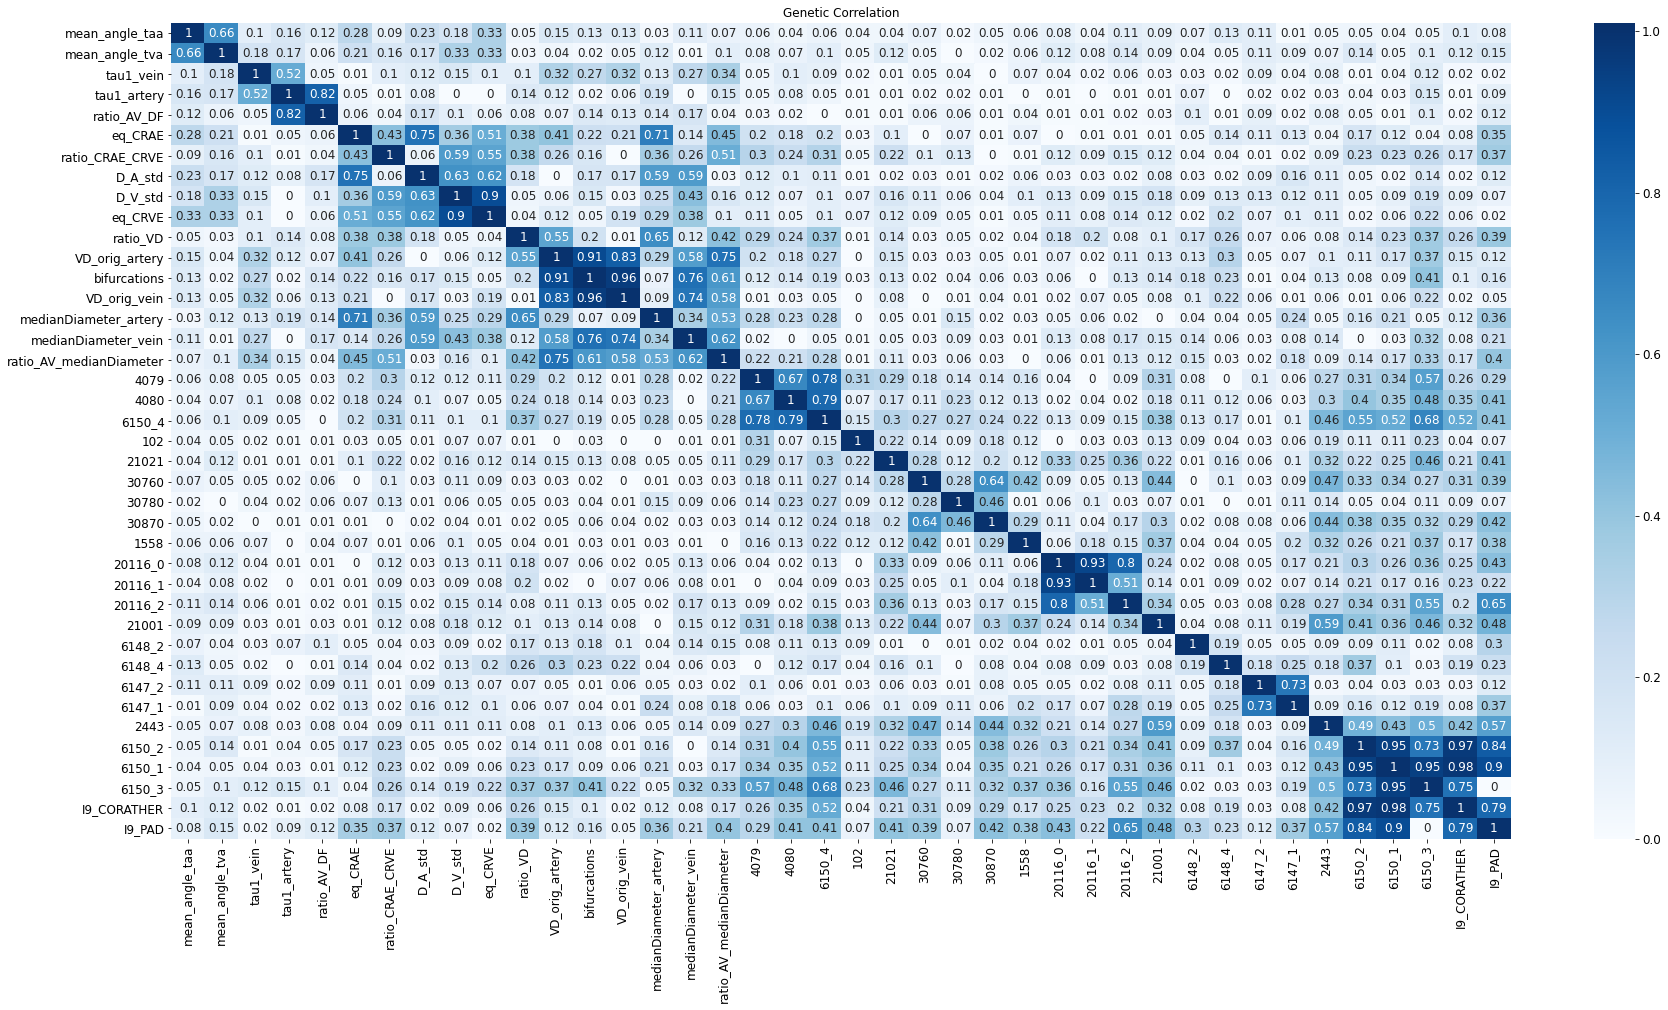

In [ ]:
##### PLOT
df_corr = df_corr.astype(float)
df_corr= df_corr.replace(np.nan, 0)

plt.figure(figsize=(30,15))
#plt.figure(figsize=(10,10))
sb.heatmap(abs(df_corr),cmap="Blues",annot=True)
#sb.heatmap(df2,vmin=0, vmax=1,cmap="Blues",annot=True)
plt.title('Genetic Correlation')
#plt.savefig(save_dir+str(DATE)+'_'+'ventile'+str(ventile_num)+'_heatmap_diseases_gcorr.pdf', bbox_inches='tight', dpi=250)


#### b) pairwise distance metric: an easy proxy for "correlation distance": 1 - abs(corr)
##### clustering method: average

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


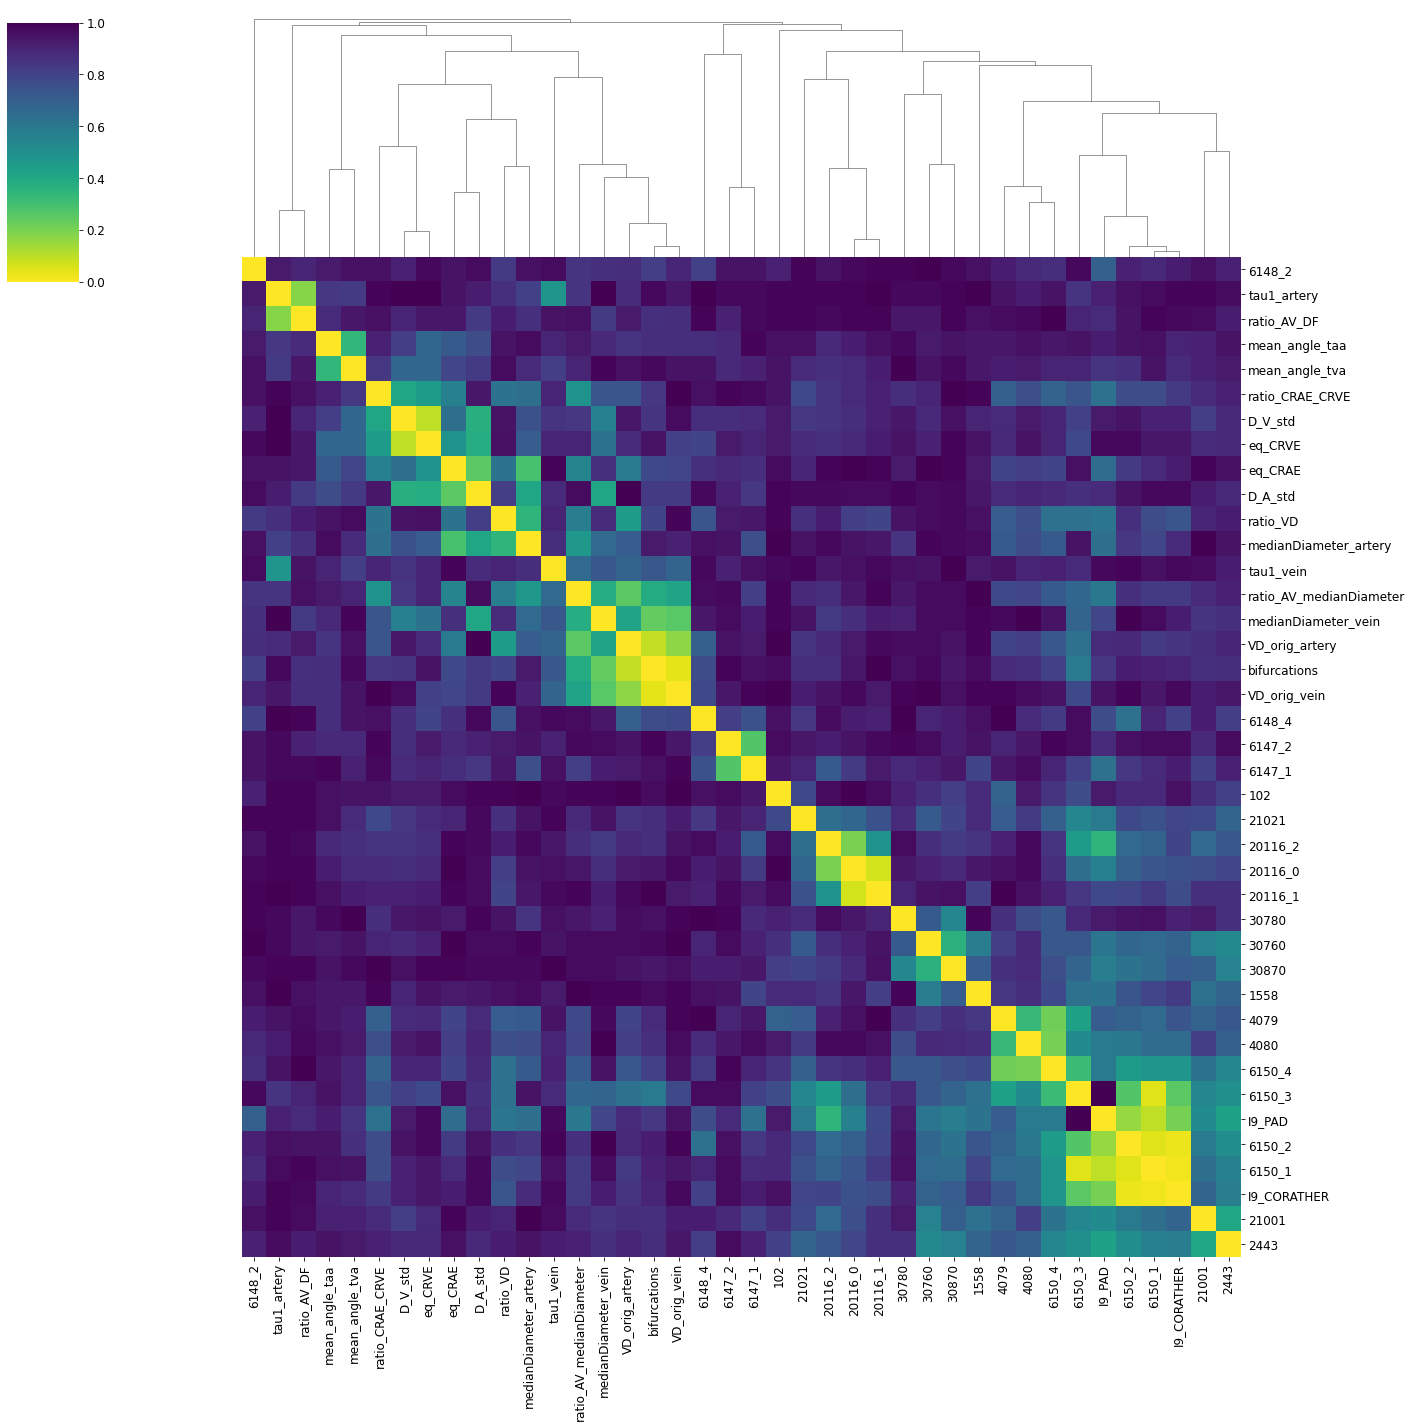

In [ ]:
import seaborn as sns
from matplotlib import cm
from matplotlib import pyplot as plt
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
### You need to: 
## - delete the nans, 
## - diagonal to 0, and
## - abs(linkage)

df_2_nan = df_corr
df_2_nan=df_2_nan.replace(np.nan,1)
#print('Count nans: ', df2.isna().sum().sum(), df_2_nan.isna().sum().sum())
# pairwise distance: define distance between two perfectly negatively correlated traits as 0
df_otro = 1 - abs(df_2_nan) 
## diagonal same value:
df_otro.values[[np.arange(df_otro.shape[0])]*2] = 0

linkage = hc.linkage(sp.distance.squareform(df_otro), method='average')
lik_abs= abs(linkage)
h = sns.clustermap(df_otro, row_linkage=lik_abs, col_linkage=lik_abs, cmap=cm.get_cmap('viridis_r'), figsize=(20,20), vmin=0, vmax=1)
h.ax_row_dendrogram.set_visible(False)
#h.ax_heatmap.xaxis.tick_top()
h.ax_heatmap.tick_params(axis='x', rotation=90)
#plt.savefig('/SSD/home/sofia/retina-phenotypes/complementary/GWAS_postprocessing/ldsr_correlation/diseases_12_08_2022_gcorrimagen.jpg')